In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar warnings
warnings.filterwarnings("ignore")

In [2]:
df_ironclad = pd.read_csv("../Load_data/DataSet_IC.csv")
df_silent = pd.read_csv("../Load_data/DataSet_TS.csv")
df_defect = pd.read_csv("../Load_data/DataSet_DF.csv")
df_watcher = pd.read_csv("../Load_data/DataSet_WT.csv")


In [3]:
df_ironclad["character"] = "ironclad"
df_silent["character"] = "silent"
df_defect["character"] = "defect"
df_watcher["character"] = "watcher"

In [4]:
df_watcher.shape

(15740, 377)

In [5]:
df = pd.concat([df_ironclad, df_silent, df_defect, df_watcher], axis=0, ignore_index=True)

In [6]:
df.shape

(302459, 868)

In [7]:
df = df.fillna(0)

In [8]:
df.columns

Index(['character', 'max_hp', 'entering_hp', 'damage_taken', 'enemies',
       'level_asc_floor', 'dmg_mean_ascension', 'enemy_type', 'Anger',
       'Anger+1',
       ...
       'Worship+1', 'WreathOfFlame', 'WreathOfFlame+1', 'Damaru', 'GoldenEye',
       'Melange', 'PureWater', 'TeardropLocket', 'VioletLotus', 'Yang'],
      dtype='object', length=868)

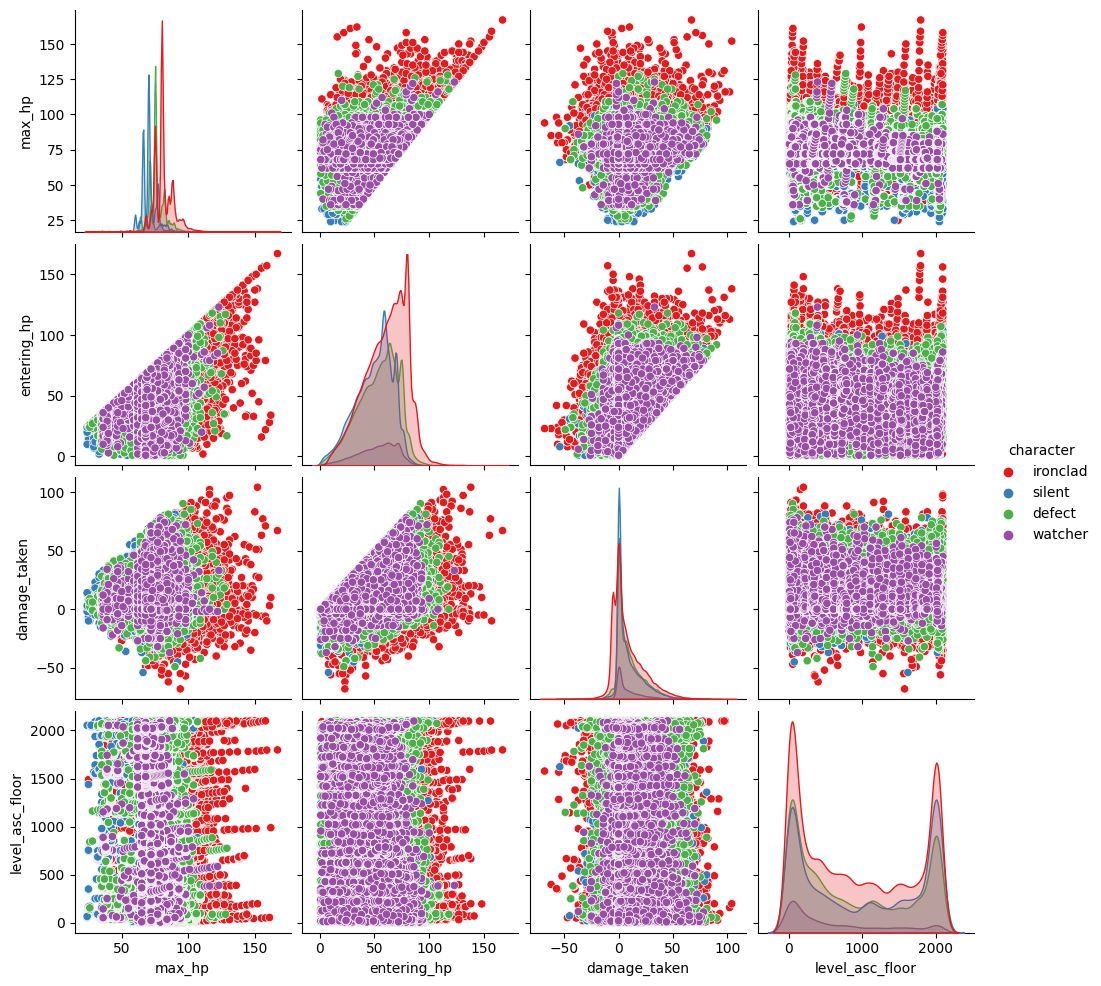

In [9]:
# Seleccionar las columnas de interés y eliminar filas con valores NaN
df_filtered = df[['max_hp', 'entering_hp', 'damage_taken', 'level_asc_floor', 'character']].dropna()

# Crear la gráfica de pares
sns.pairplot(df_filtered, hue='character', palette='Set1')

# Mostrar la gráfica
plt.show()

In [10]:
df_filtered = df[['max_hp', 'entering_hp', 'damage_taken', 'level_asc_floor', 'character']].dropna()

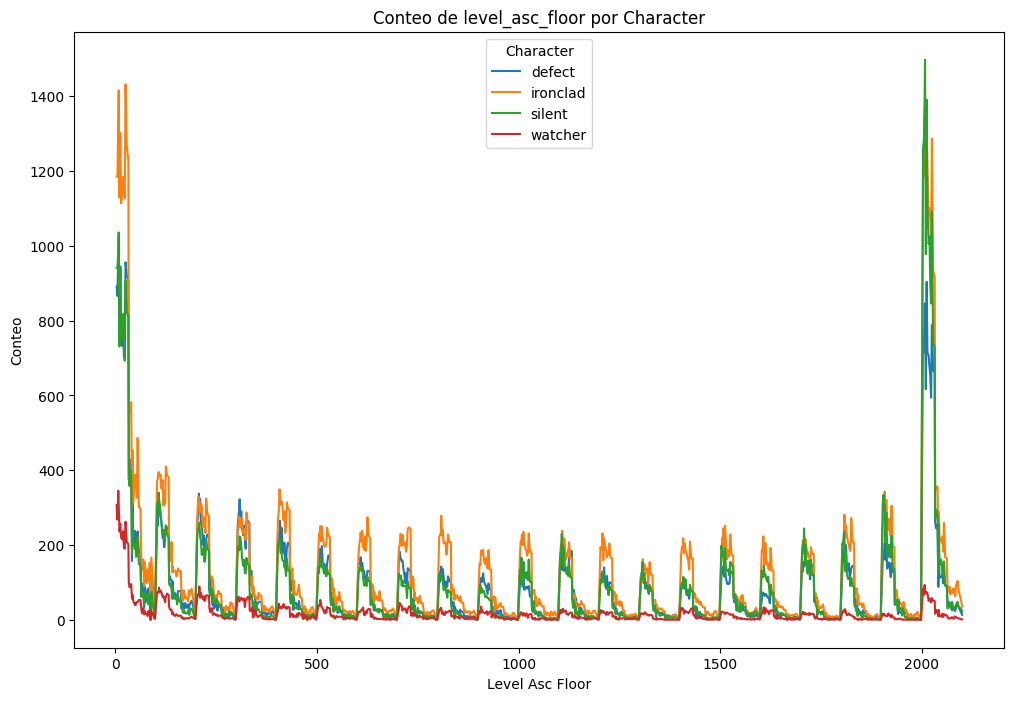

In [11]:
# Contar la frecuencia de cada valor en 'level_asc_floor', dividido por 'character'
counts = df_filtered.groupby(['level_asc_floor', 'character']).size().unstack().fillna(0)

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
for character in counts.columns:
    plt.plot(counts.index, counts[character], label=character)

# Personalizar el gráfico
plt.title('Conteo de level_asc_floor por Character')
plt.xlabel('Level Asc Floor')
plt.ylabel('Conteo')
plt.legend(title='Character')

# Mostrar el gráfico
plt.show()

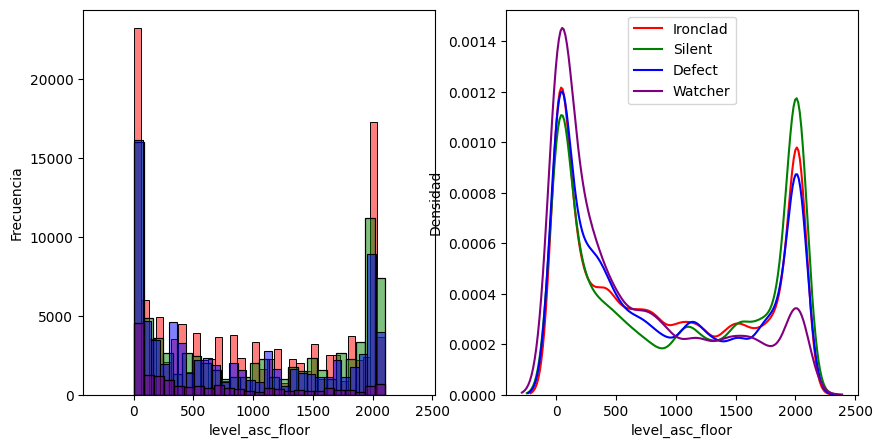

In [12]:
var = "level_asc_floor"
var_titulo = "level_asc_floor"

colors = {"ironclad": "red", "silent": "green", "defect": "blue", "watcher": "purple"}

#creo 2 subgráficos con seaborn (histograma, curva de densidad)
fig, ax = plt.subplots (1,2, figsize=(10,5), sharex=True)

#Histograma
sns.histplot(data=df_ironclad, x=var, label="Ironclad", ax=ax[0], color=colors["ironclad"], alpha=0.5)
sns.histplot(data=df_silent, x=var, label="Silent", ax=ax[0], color=colors["silent"], alpha=0.5)
sns.histplot(data=df_defect, x=var, label="Defect", ax=ax[0], color=colors["defect"], alpha=0.5)
sns.histplot(data=df_watcher, x=var, label="Watcher", ax=ax[0], color=colors["watcher"], alpha=0.5)
ax[0].set_xlabel(var_titulo)
ax[0].set_ylabel("Frecuencia")

#curva de densidad
sns.kdeplot(data=df_ironclad, x=var, label="Ironclad", fill=False,  ax=ax[1], color=colors["ironclad"])
sns.kdeplot(data=df_silent, x=var, label="Silent", fill=False, ax=ax[1], color=colors["silent"])
sns.kdeplot(data=df_defect, x=var, label="Defect", fill=False, ax=ax[1], color=colors["defect"])
sns.kdeplot(data=df_watcher, x=var, label="Watcher", fill=False, ax=ax[1], color=colors["watcher"])
ax[1].set_xlabel(var_titulo)
ax[1].set_ylabel("Densidad")
ax[1].legend()

plt.show()

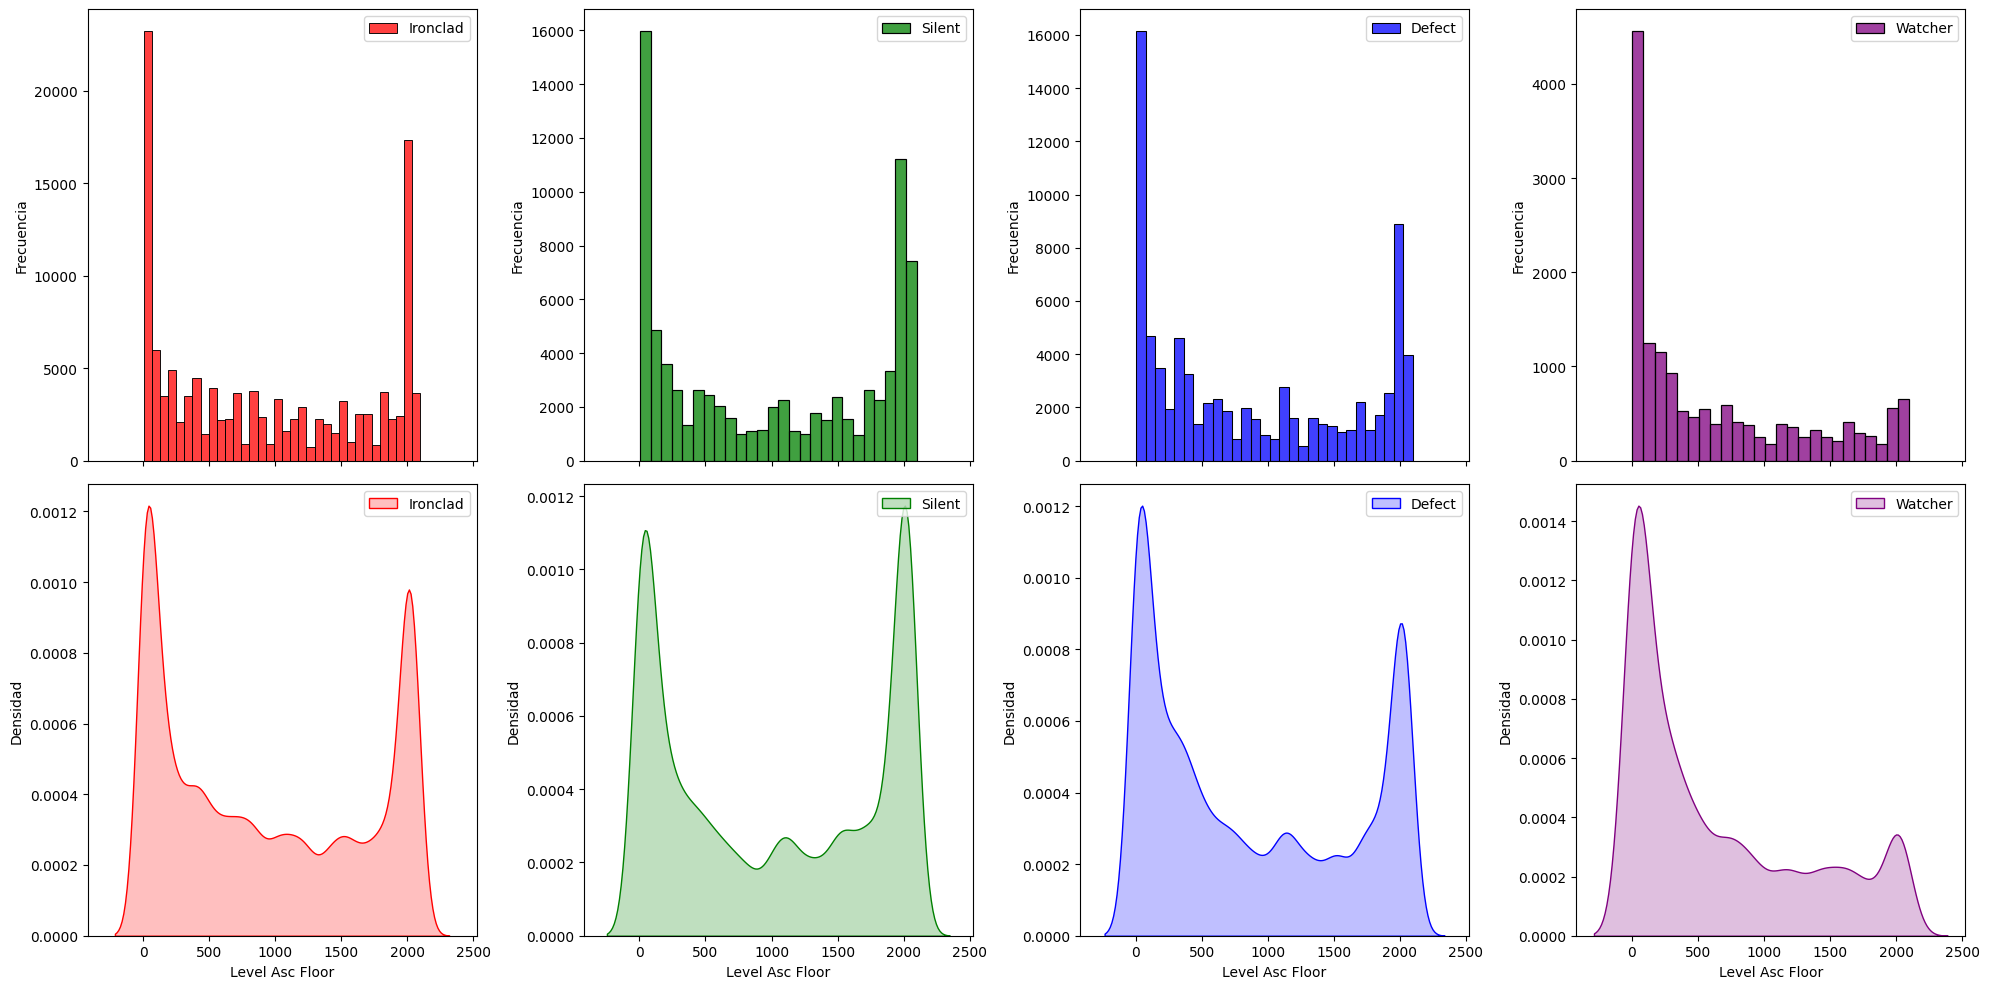

In [16]:
var = "level_asc_floor"
var_titulo = "Level Asc Floor"

colors = {"ironclad": "red", "silent": "green", "defect": "blue", "watcher": "purple"}

# Crear 8 subgráficos en una figura con 2 filas y 4 columnas
fig, axs = plt.subplots(2, 4, figsize=(20,10), sharex=True)

# Definir los DataFrames y etiquetas
dataframes = [df_ironclad, df_silent, df_defect, df_watcher]
labels = ["Ironclad", "Silent", "Defect", "Watcher"]

# Plotear histogramas en la primera fila
for i, (df, label) in enumerate(zip(dataframes, labels)):
    sns.histplot(data=df, x=var, label=label, ax=axs[0, i], color=colors[label.lower()], kde=False)
    axs[0, i].set_xlabel(var_titulo)
    axs[0, i].set_ylabel("Frecuencia")
    axs[0, i].legend()

# Plotear curvas de densidad en la segunda fila
for i, (df, label) in enumerate(zip(dataframes, labels)):
    sns.kdeplot(data=df, x=var, label=label, fill=True, ax=axs[1, i], color=colors[label.lower()])
    axs[1, i].set_xlabel(var_titulo)
    axs[1, i].set_ylabel("Densidad")
    axs[1, i].legend()

plt.tight_layout()
plt.show()

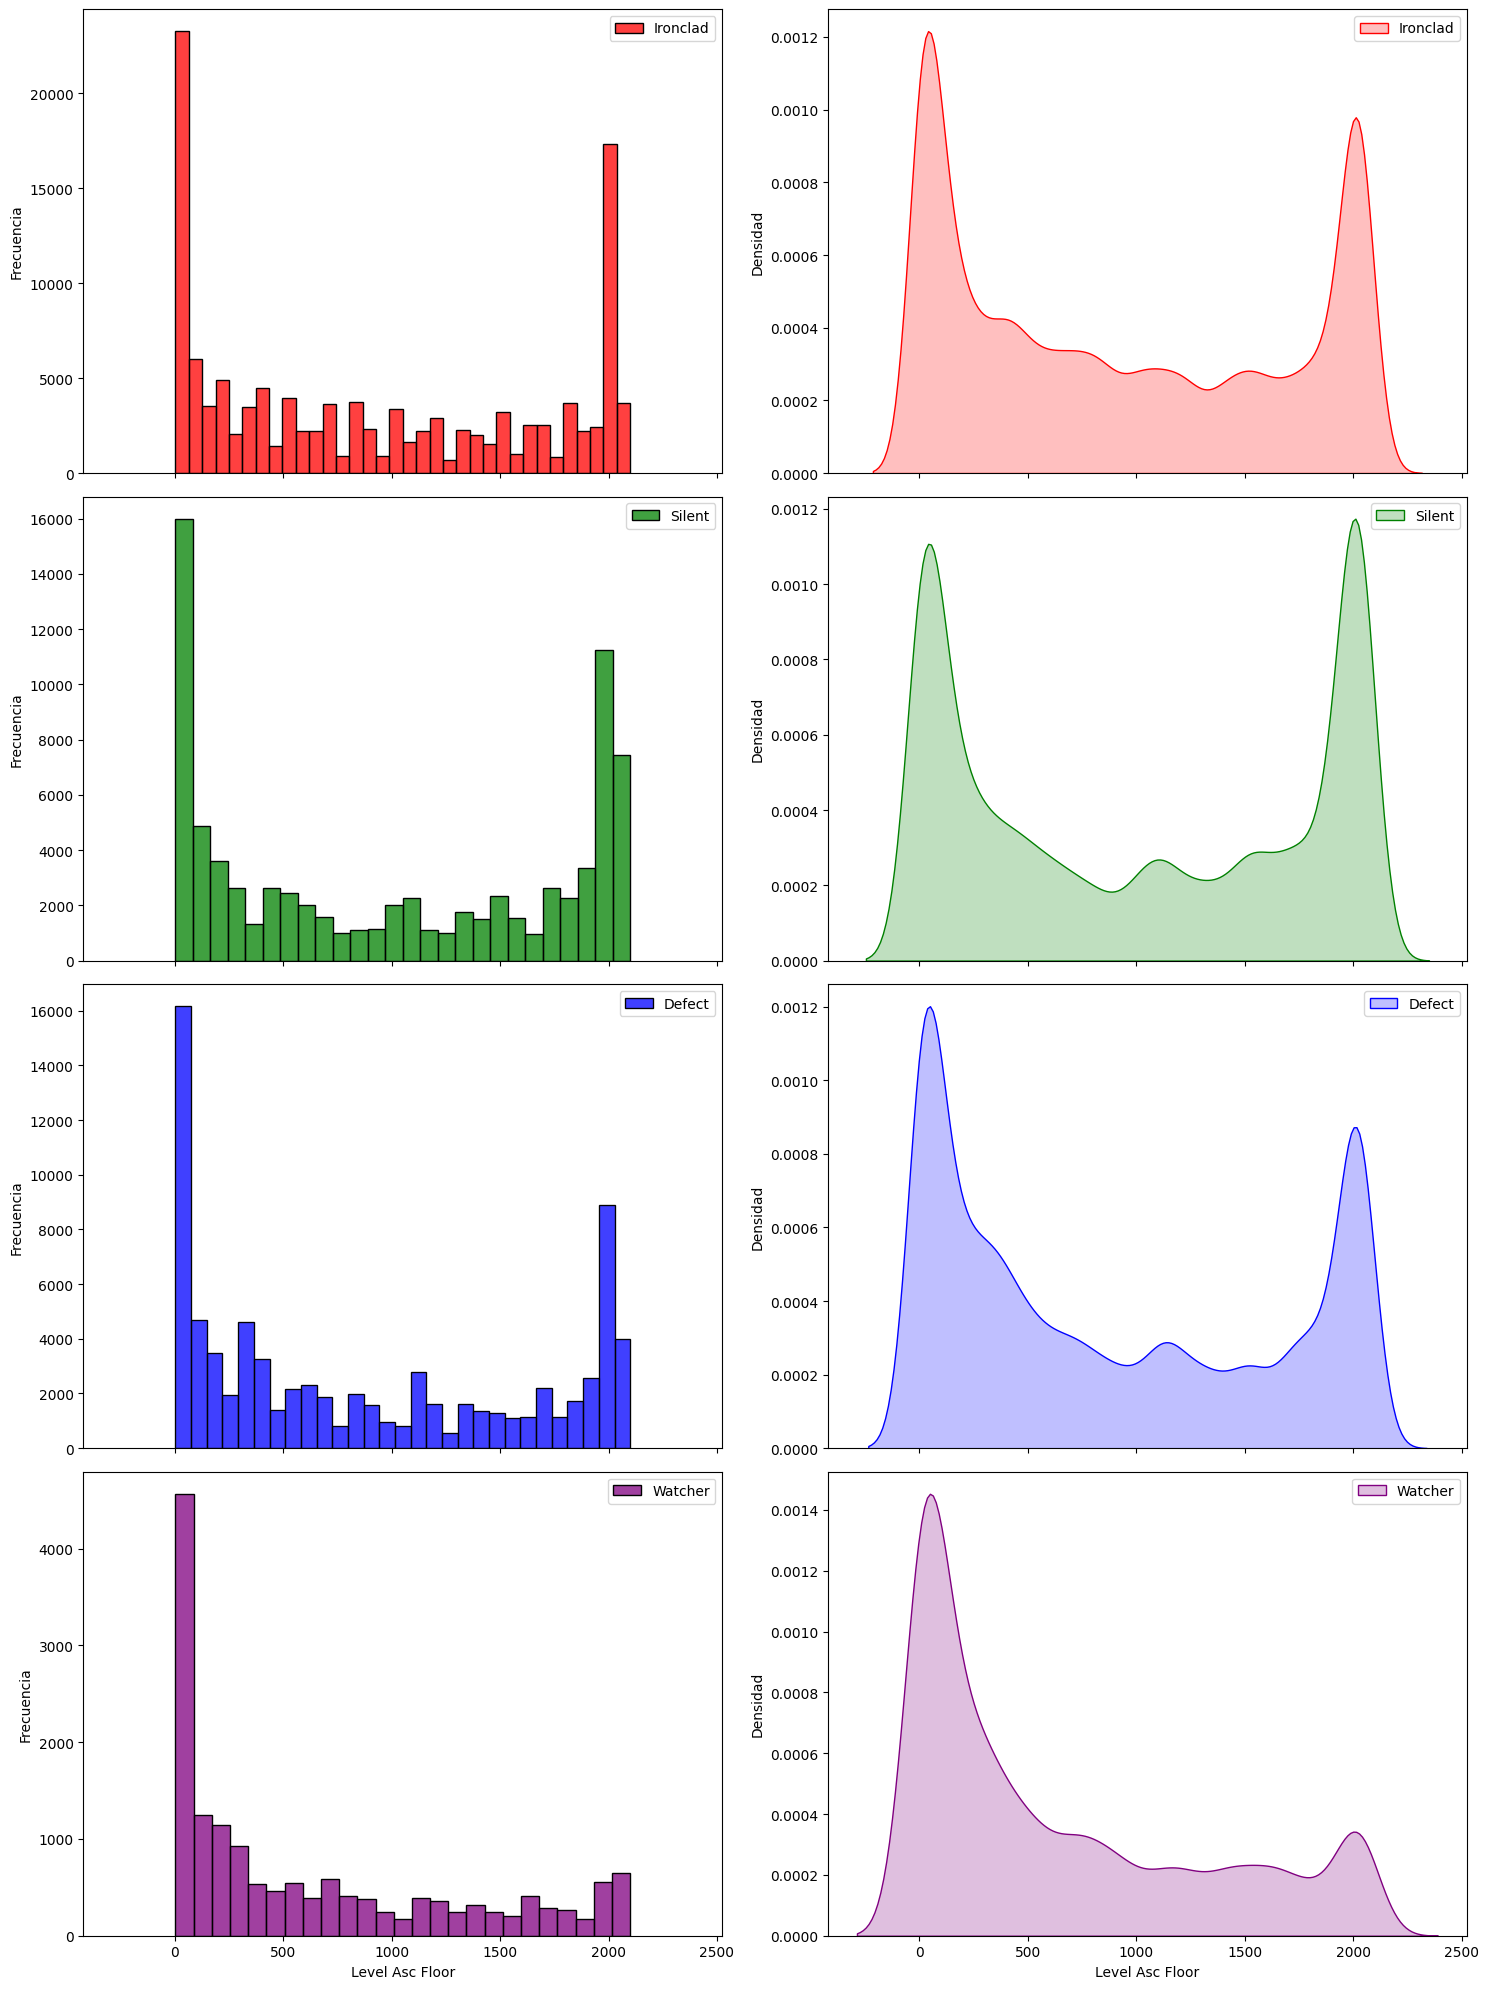

In [19]:
# Variables para el gráfico
var = "level_asc_floor"
var_titulo = "Level Asc Floor"

colors = {"ironclad": "red", "silent": "green", "defect": "blue", "watcher": "purple"}

# Crear 8 subgráficos en una figura con 4 filas y 2 columnas
fig, axs = plt.subplots(4, 2, figsize=(15, 20), sharex=True)

# Definir los DataFrames y etiquetas
dataframes = [df_ironclad, df_silent, df_defect, df_watcher]
labels = ["Ironclad", "Silent", "Defect", "Watcher"]

# Alternar histogramas y curvas de densidad
for i, (df, label) in enumerate(zip(dataframes, labels)):
    # Histograma
    sns.histplot(data=df, x=var, label=label, ax=axs[i, 0], color=colors[label.lower()], kde=False)
    axs[i, 0].set_xlabel(var_titulo)
    axs[i, 0].set_ylabel("Frecuencia")
    axs[i, 0].legend()
    
    # Curva de densidad
    sns.kdeplot(data=df, x=var, label=label, fill=True, ax=axs[i, 1], color=colors[label.lower()])
    axs[i, 1].set_xlabel(var_titulo)
    axs[i, 1].set_ylabel("Densidad")
    axs[i, 1].legend()

plt.tight_layout()
plt.show()

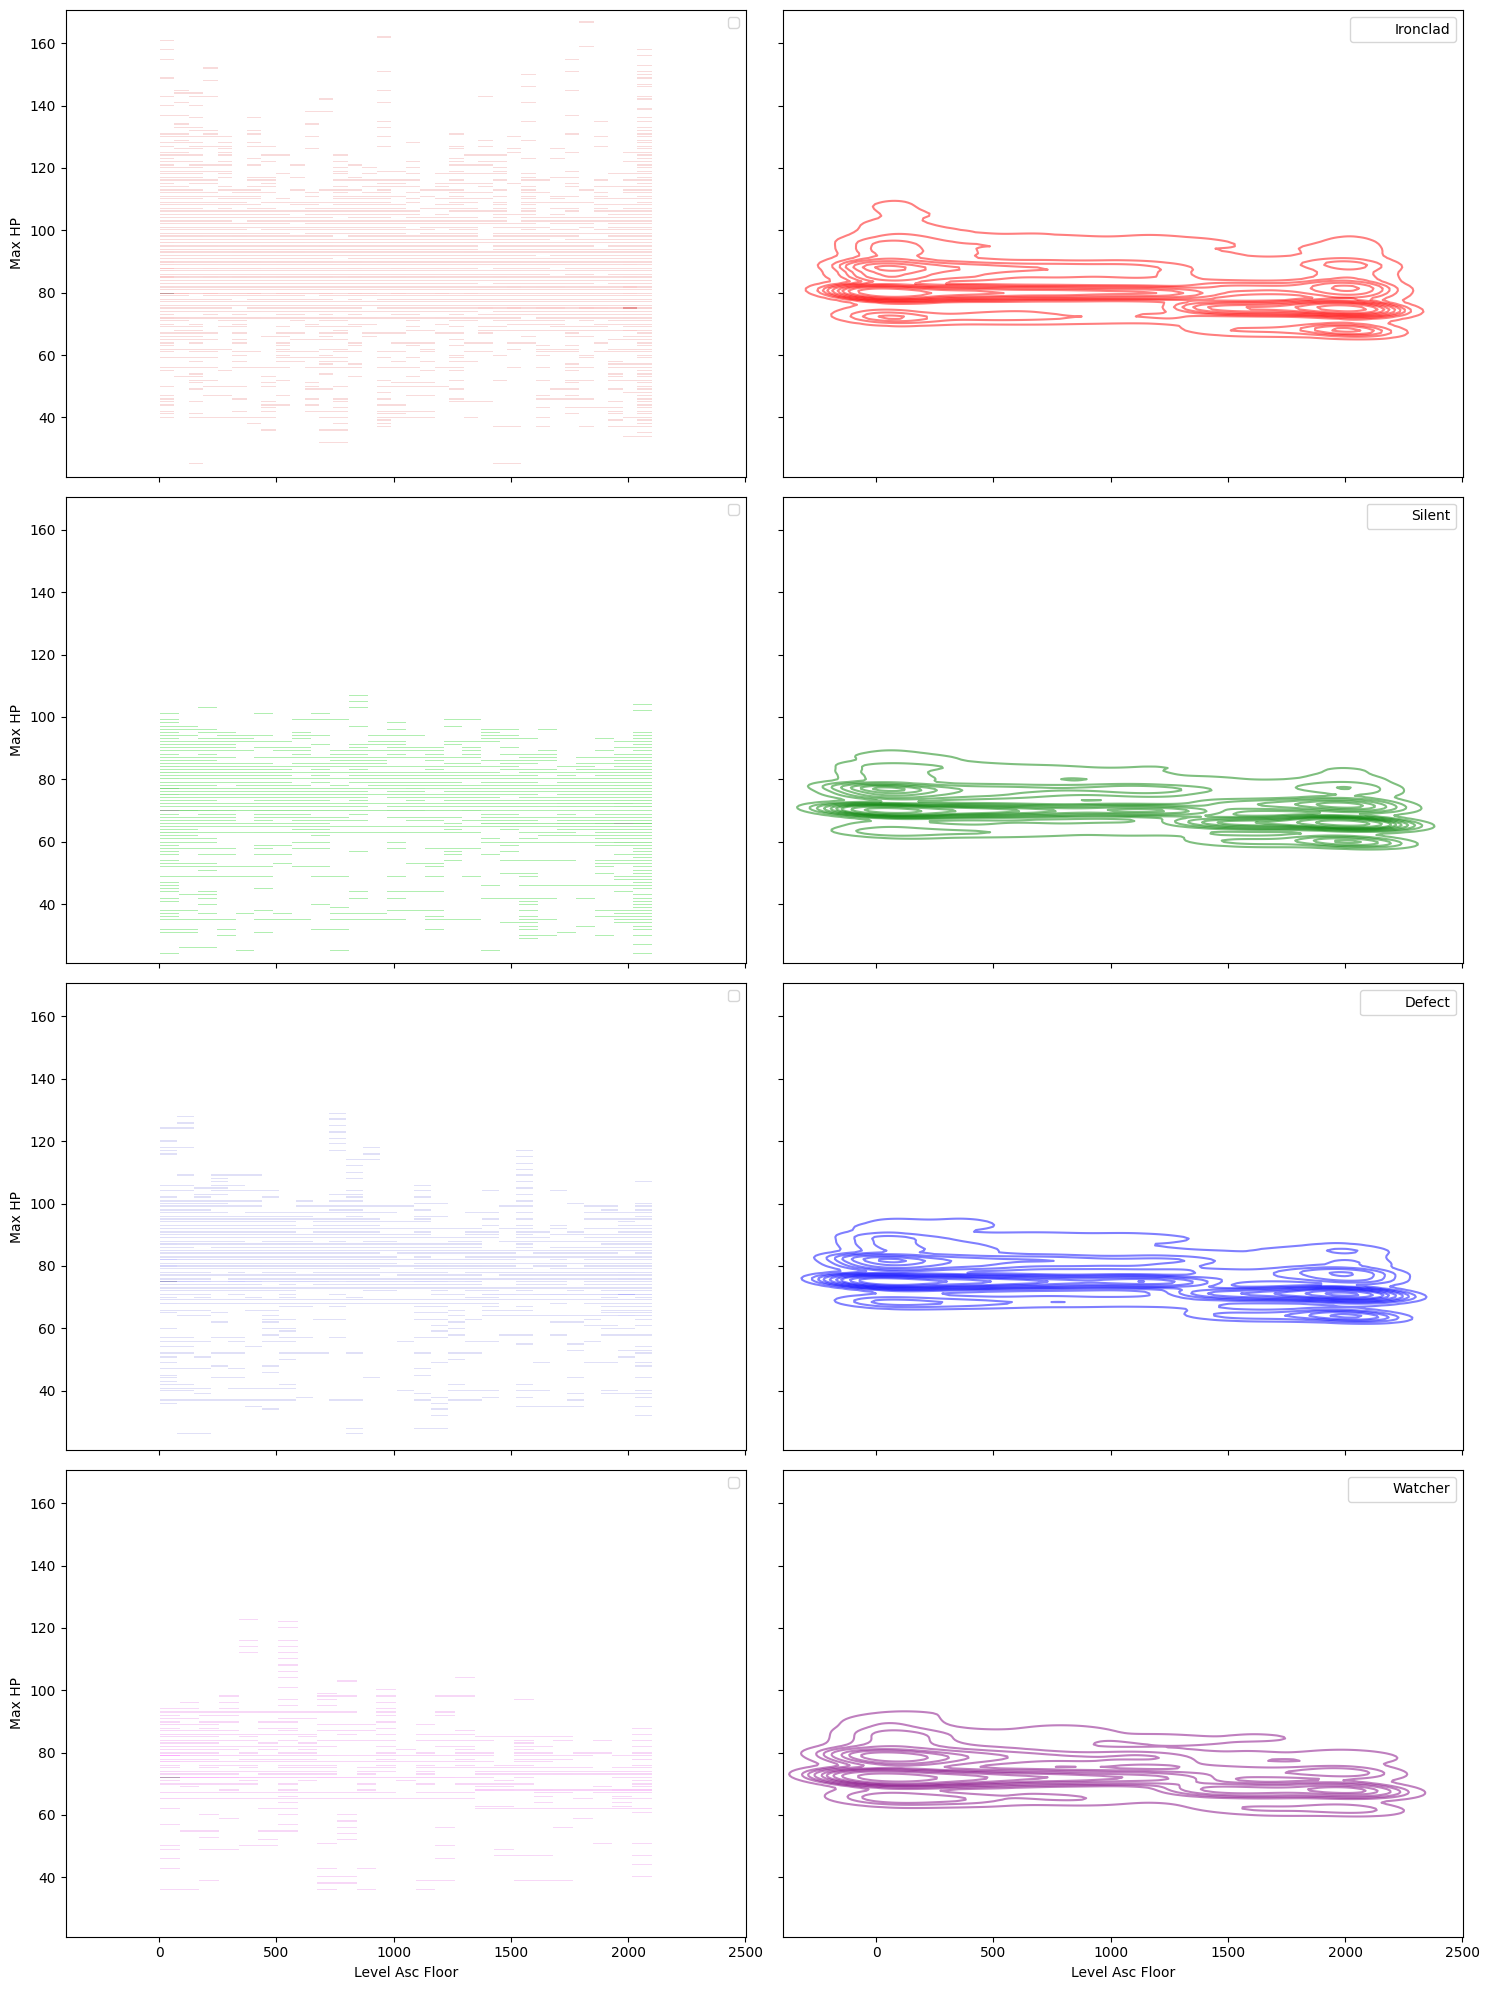

In [21]:
# Variables para el gráfico
x_var = "level_asc_floor"
y_var = "max_hp"
x_var_titulo = "Level Asc Floor"
y_var_titulo = "Max HP"

colors = {"ironclad": "red", "silent": "green", "defect": "blue", "watcher": "purple"}

# Crear 8 subgráficos en una figura con 4 filas y 2 columnas
fig, axs = plt.subplots(4, 2, figsize=(15, 20), sharex=True, sharey=True)

# Definir los DataFrames y etiquetas
dataframes = [df_ironclad, df_silent, df_defect, df_watcher]
labels = ["Ironclad", "Silent", "Defect", "Watcher"]

# Alternar histogramas y curvas de densidad
for i, (df, label) in enumerate(zip(dataframes, labels)):
    # Histograma
    sns.histplot(data=df, x=x_var, y=y_var, ax=axs[i, 0], color=colors[label.lower()], alpha=0.5, kde=False)
    axs[i, 0].set_xlabel(x_var_titulo)
    axs[i, 0].set_ylabel(y_var_titulo)
    axs[i, 0].legend([label])
    
    # Curva de densidad
    sns.kdeplot(data=df, x=x_var, y=y_var, ax=axs[i, 1], color=colors[label.lower()], fill=False, alpha=0.5)
    axs[i, 1].set_xlabel(x_var_titulo)
    axs[i, 1].set_ylabel(y_var_titulo)
    axs[i, 1].legend([label])

plt.tight_layout()
plt.show()